In [4]:
pip install -Uq fastai "duckduckgo_search>=6.2"


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from duckduckgo_search import DDGS
from fastcore.all import *



In [7]:
#function to search and download 200 images from duckduckgo 

def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot("image")

#returns a list - L in fastai, of images. 
#DDGS().image() is a package that returns a dictionary that has ('title', 'image(url)', 'thumbnail'.....)
#we get the image url

In [9]:
#sample bird picture

url = search_images("bird picture", 1)
url[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

In [ ]:
#download this bird picture using download_url in fast ai. It locally saves the image of the bird an dreturn the path

from fastdownload import download_url
dest = 'bird.jpg'
download_url(url[0],dest=dest, show_progress=False)


Path('bird.jpg')

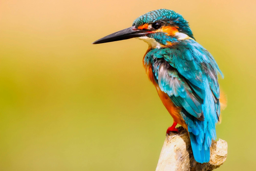

In [12]:
#making the image in proper resolution i.e., 256*256 using vision library

from fastai.vision.all import *
img = Image.open(dest)
img.to_thumb(256, 256)

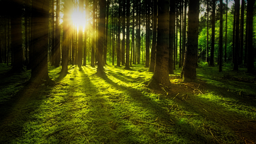

In [34]:
#searching (search_images), downloading (download_url), opening(Image.open) 
# a forest image in 256*256 resolution like the bird image

download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256, 256)

In [49]:
from pathlib import Path
search_terms = "river", "land"
path = Path("land_or_not")

for i in search_terms:
    dest = (path/i)
    path.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f"i photo"))
    time.sleep(5)
    resize_images(path/i, max_size=400, dest=path/i)

In [58]:


from pathlib import Path
search_terms = "day sky", "night sky"                                      #search terms for two diff categories
path = Path("day_or_not")                                          #specifying the path under which two folders will be created

for i in search_terms:                                              #looping through each terms
    dest = path/i                                                   #folder naming - land_or_not/land then land_or_not/river
    path.mkdir(exist_ok=True, parents=True)                         #creating a folder/directory
    download_images(dest, urls=search_images(f'{i} photo'))         #downloading images
    time.sleep(5)                                                   #sleep time so the rate limit is not hit
    resize_images(dest=path/i, max_size=400, path=path/i)           #resizing and saving to same folder

In [59]:
#remove failed to download images

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

26

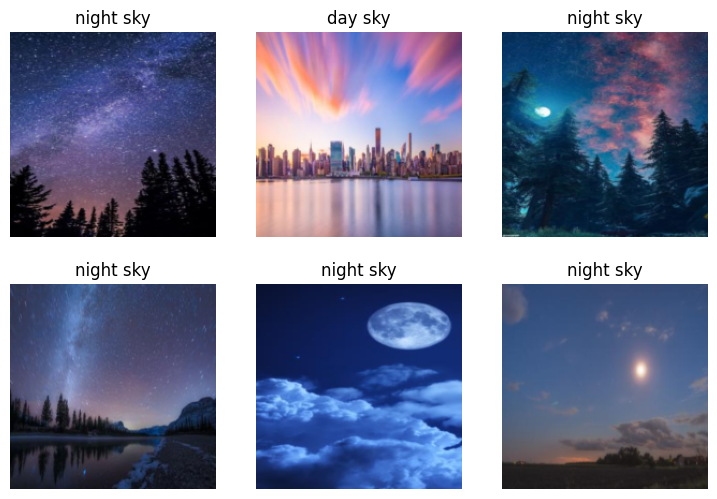

In [60]:
#Training our model with Dataloaders
#There are 5 parameter to give to a datablock - 1) Specify the input output type in block param
# 2) where to get the files in get_items
# 3) splitting them into training and testing using splitter
# 4) specify the labels using get_y
# 5) transformation using item_tfms
dls = DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
    get_y = parent_label,
    item_tfms=[Resize(192, method="squish")]
).dataloaders(path, bs = 32)

dls.show_batch(max_n=6)


In [61]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\junai/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

In [67]:
download_url(url=search_images('titanic night sky', 1)[0], dest = 'titanic.jpg')

Path('titanic.jpg')

In [66]:
search_images('titanic sky picture', 1)[0]

'https://img.freepik.com/premium-photo/majestic-grandiose-titanic-sailing-through-starfilled-night-sky_756535-1747.jpg?w=2000'